### Bias Correction Practice

In [12]:
import netCDF4 as nc
import sys
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import datetime
import scipy.stats

In [20]:
#Read in ERA-Interim
#Let's read in the annual mean precipitation, wind speed, temperature, and pressure from ERA-Interim
file = '/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc_ann'
#Let's read in the annual mean precipitation, specific humidity, temperature, and pressure from ERA-Interim
fp = nc.Dataset(file)
output_era = {}
output_era['t_ref'] = 273.15 + fp['t2m'][:]
times = fp['time']
output_era['dates'] = nc.num2date(times[:],units=times.units,calendar=times.calendar)
fp.close()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: tostring

In [4]:
#Let's read in the annual mean precipitation, specific humidity, temperature, and pressure from ERA-Interim
output_gfdl = {}
file = '/data/GFDL/atmos.1980-2014.t_ref.nc_ann'
fp = nc.Dataset(file)
output_gfdl['t_ref'] = fp['t_ref'][:]
times = fp['time']
output_gfdl['dates'] = nc.num2date(times[:],units=times.units,calendar=times.calendar)
fp.close()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: tostring() is deprecated. Use t

In [21]:
#%%bash
#ncdump -h '/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc_ann'
%matplotlib inline
output_era = {}
vars = ['precip','evap','t_ref','ps']
for var in vars:
    if var in ['evap','precip']:
        output_era[var] = 365*fp[var][:]
    if var == 't_ref':
        output_era['t_ref'] = 273.15 + fp['t2m'][:]
    if var == 'ps':
        output_era['ps'] = 100*fp['p_sfc'][:]
    times = fp['time']
    output_era['dates'] = nc.num2date(times[:],units=times.units,calendar=times.calendar)
fp.close()
#Let's show some basic statistics of this data (subplot,mean)
#Let's create a dictionary for colormaps
info = {'precip':{'cmap':'terrain','title':'Precipitation (mm/year)'},
        't_ref':{'cmap':'RdBu_r','title':'Temperature (K)'},
        'evap':{'cmap':'Blues','title':'Evaporation (mm/year)'},
        'ps':{'cmap':'jet','title':'Pressure (Pa)'}}
fig = plt.figure(figsize=(10,10))
for var in vars:
    plt.subplot(2,2,vars.index(var)+1)
    plt.imshow(np.flipud(np.mean(output_era[var],axis=0)),cmap=plt.get_cmap(info[var]['cmap']))
    cb = plt.colorbar(shrink=0.8,orientation='horizontal',pad=0.03)
    cb.ax.tick_params(labelsize=15,rotation=30)
    plt.title(info[var]['title'],fontsize=20)
    plt.axis('off')
fig.tight_layout()
plt.show()

RuntimeError: NetCDF: Not a valid ID

In [18]:
#Spatial mean time series
fig = plt.figure(figsize=(10,7))
for var in vars:
    plt.subplot(2,2,vars.index(var)+1)
    data = np.mean(np.mean(output_era[var],axis=1),axis=1)
    plt.plot(output_era['dates'],data,lw=3)
    plt.title(info[var]['title'],fontsize=20)
    plt.xticks(fontsize=15,rotation=35)
    plt.yticks(fontsize=15)
fig.tight_layout()
plt.show()

TypeError: 'builtin_function_or_method' object is not iterable

<Figure size 720x504 with 0 Axes>

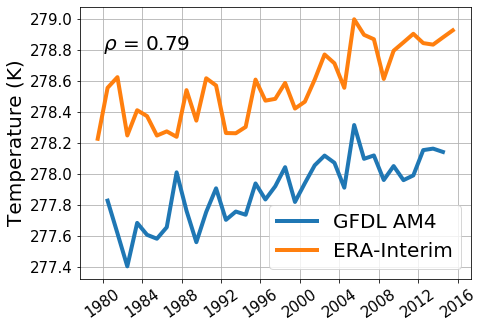

In [13]:
#Compute masks
dates_gfdl = output_gfdl['dates']
dates_era = output_era['dates']
m_gfdl = (dates_gfdl >= datetime.datetime(1980,1,1)) & (dates_gfdl <= datetime.datetime(2014,1,31))
m_era = (dates_era >= datetime.datetime(1980,1,1)) & (dates_era <= datetime.datetime(2014,1,31))

#Compare global time series
var = 't_ref'
fig = plt.figure(figsize=(7,5))
tref_am4 = np.mean(np.mean(output_gfdl[var],axis=1),axis=1)
tref_era = np.mean(np.mean(output_era[var],axis=1),axis=1)
plt.plot(output_gfdl['dates'],tref_am4,lw=4)
plt.plot(output_era['dates'],tref_era,lw=4)
plt.legend(['GFDL AM4','ERA-Interim'],fontsize=20)
plt.text(datetime.datetime(1980,1,1),278.8,
        r'$\rho$ = %.2f' % scipy.stats.pearsonr(tref_am4[m_gfdl],tref_era[m_era])[0],fontsize=20)
plt.ylabel('Temperature (K)',fontsize=20)
plt.xticks(fontsize=15,rotation=35)
plt.yticks(fontsize=15)
plt.grid('on')
plt.show()

In [ ]:
def compute_ecdf(data):
    x = np.sort(data)
    n = x.size
    #Use weibull plotting positions
    y = 100*np.arange(1, n+1) / n
    return(x,y)

#Compare global time series
var = 't_ref'
fig = plt.figure(figsize=(14,5))
plt.subplot(121)
tref_am4 = np.mean(np.mean(output_gfdl[var],axis=1),axis=1)
tref_era = np.mean(np.mean(output_era[var],axis=1),axis=1)
tref_am4 = tref_am4[m_gfdl]
tref_era = tref_era[m_era]
plt.hist(tref_am4,bins=10,density=1,alpha=0.6)
plt.hist(tref_era,bins=10,density=1,alpha=0.6)
plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.xticks(fontsize=15,rotation=35)
plt.yticks(fontsize=15)
plt.grid('on')
plt.subplot(122)
(scores_am4,pcts_am4) = compute_ecdf(tref_am4)
plt.plot(scores_am4,pcts_am4,lw=4)
(scores_era,pcts_era) = compute_ecdf(tref_era)
plt.plot(scores_era,pcts_era,lw=4)
plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('Percentiles',fontsize=20)
plt.xticks(fontsize=15,rotation=35)
plt.yticks(fontsize=15)
plt.grid('on')
plt.tight_layout()
plt.show()